# <center><u>Support Vector Machines (SVM)</u></center>


Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.



### PROBLEM STATEMENT- Email Spam Classifier


In this assignment, we'll build a SVM classifier to classify emails into spam and ham. The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as **spam** or **ham**.

The dataset can be downloaded from your canvas account



## Data Understanding

Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [ ]:
'''import numpy, pandas, train_test_split, StandardScaler,confusion_matrix,
validation_curve, KFold, cross_val_score, GridSearchCV, matplotlib and seaborn'''

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the data, use seperation as comma(,) and header as None
email_rec = pd.read_csv("/content/Spam (1).csv")

In [4]:

#print email_rec
email_rec

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


As of now, the columns are named as integers. Let's manually name the columns appropriately (column names are available below sequencially)

`["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
                      "capital_run_length_longest", "capital_run_length_total", "spam"]`

In [5]:
# renaming the columns
# print head
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [6]:
# look at dimensions of the DataFrame
email_rec.shape

(4601, 58)

In [8]:
# Check data type information
email_rec.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [9]:
#Check if any missing values in the dataset
email_rec.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Let's also look at the fraction of spam and ham emails in the dataset.

In [10]:
# look at fraction of spam emails
email_rec['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

You can see that we have 40% of spam mails and 60% of ham


## Data Preparation

Let's now conduct some prelimininary data preparation steps, i.e. rescaling the variables, splitting into train and test etc. To understand why rescaling is required, let's print the summary stats of all columns - you'll notice that the columns at the end (capital_run_length_longest, capital_run_length_total etc.) have much higher values (means = 52, 283 etc.) than most other columns which represent fraction of word occurrences (no. of times word appears in email/total no. of words in email).

In [11]:
#  print the summary stats of all columns
email_rec.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [56]:
# splitting data into X (having all features) and y (having target i.e spam)
X = email_rec.iloc[:,:-1]

y = email_rec.iloc[:,-1:]

In [57]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [58]:
y.head()

,spam
0,1
1,1
2,1
3,1
4,1


#### Scaling the features

We will Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

x = x-mean(x)/std(x)

Note: Scale() is Equivalent function without the estimator API and has risk of data leak



In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
# Instantiate StandardScaler
scaler = StandardScaler()

#fit and transform X
X= scaler.fit_transform(X)


In [61]:
X

array([[-3.42433707e-01,  3.30884903e-01,  7.12858774e-01, ...,
        -4.52472762e-02,  4.52979198e-02, -8.72413388e-03],
       [ 3.45359395e-01,  5.19091945e-02,  4.35129540e-01, ...,
        -2.44326749e-03,  2.50562832e-01,  1.22832407e+00],
       [-1.45921392e-01, -1.65071912e-01,  8.51723390e-01, ...,
         1.45920848e-01,  2.22110599e+00,  3.25873251e+00],
       ...,
       [ 6.40127868e-01, -1.65071912e-01,  3.83734930e-02, ...,
        -1.19382054e-01, -2.36941335e-01, -2.72627750e-01],
       [ 2.80176333e+00, -1.65071912e-01, -5.56760578e-01, ...,
        -1.27482666e-01, -2.42072958e-01, -3.38603654e-01],
       [-3.42433707e-01, -1.65071912e-01,  7.32696576e-01, ...,
        -1.24236117e-01, -2.42072958e-01, -4.01280763e-01]])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# split into train and test with test_size as 30% and random_state as 4
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [64]:
X_train

array([[-0.34243371,  0.35413288,  0.0978869 , ...,  0.02898206,
         0.4455645 , -0.01367233],
       [-0.34243371, -0.16507191,  1.16912823, ..., -0.07093599,
        -0.21128322, -0.30231691],
       [ 2.11397023, -0.16507191, -0.55676058, ..., -0.09665621,
        -0.20101998, -0.32705787],
       ...,
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.12029613,
        -0.24720458, -0.44911329],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.09649862,
        -0.19075673, -0.38643618],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.02787982,
        -0.19075673, -0.3748904 ]])

In [65]:
X_test

array([[-0.34243371, -0.16507191, -0.55676058, ..., -0.07181854,
        -0.12917726, -0.35674703],
       [-0.34243371,  0.45487411, -0.55676058, ..., -0.12013853,
        -0.24720458, -0.41942414],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.1303825 ,
        -0.25746783, -0.43591811],
       ...,
       [-0.34243371, -0.16507191, -0.55676058, ...,  1.41759075,
         1.24609766,  0.02921201],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.09221191,
        -0.23180971, -0.41117715],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.1281761 ,
        -0.25746783, -0.45241209]])

## Model Building

Let's build a linear SVM model now. The ```SVC()``` class does that in sklearn. We highly recommend reading the documentation at least once.

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

You can also refer help section for SVC given below:

In [ ]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

### Model building

Firstly you are going to use the default kernal i.e RBF

In [66]:
from sklearn.svm import SVC

In [67]:
# Instantiate an object of class SVC(), using cost C=1
model = SVC()

# fit model on training data

model.fit(X_train,y_train)

# predict on test data
y_pred_rbf = model.predict(X_test)
y_pred_rbf

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, ..., 1, 0, 1])

##### Evaluate the model using confusion matrix


In [68]:
# import metrics
from sklearn.metrics import confusion_matrix


#print confusion_matrix
confusion_matrix(y_test,y_pred_rbf)



array([[811,  38],
       [ 61, 471]])

#### Print other metrics

In [69]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [70]:
# accuracy
accuracy_score = accuracy_score(y_test,y_pred_rbf)


# precision

precision_score = precision_score(y_test,y_pred_rbf)


# recall/sensitivity
recall_score = recall_score(y_test,y_pred_rbf)

print(accuracy_score)
print(precision_score)
print(recall_score)

0.9283128167994207
0.925343811394892
0.8853383458646616


In [71]:
y_test
y_pred_rbf

array([0, 1, 0, ..., 1, 0, 1])

In [72]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_rbf).ravel()

In [73]:
# specificity (% of hams correctly classified)
tn / (tn+fp)

0.9552414605418139

The SVM we have built so far gives decently good results - an accuracy of 92%, sensitivity/recall (TNR) of 88%.

### Interpretation of Results

In the confusion matrix, the elements at (0, 0) and (1,1) correspond to the more frequently occurring class, i.e. ham emails. Thus, it implies that:
- 92% of all emails are classified correctly
- 88.5% of spams are identified correctly (sensitivity/recall)
- Specificity, or % of hams classified correctly, is 95%



### K-Fold Cross Validation

Let's first run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [74]:
from sklearn.model_selection import KFold,cross_val_score

In [75]:
# creating a KFold object with 5 splits , shuffle True and random_state=4
folds = KFold(n_splits=5, shuffle=True,random_state=4)
# instantiating a SVC model with cost=1 and random_state=4
cv_results = cross_val_score(model, X, y, cv=folds)

# Display the results
print(f'Cross-validation results for {folds}-fold:')
print(cv_results)
print(f'Mean accuracy: {cv_results.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validation results for KFold(n_splits=5, random_state=4, shuffle=True)-fold:
[0.92616721 0.93152174 0.93695652 0.93586957 0.92065217]
Mean accuracy: 0.9302334419109662


Computing the cross-validation scores 1(note that the argument cv takes the 'folds' object, and we have specified 'accuracy' as the metric


In [ ]:
# Computing the cross-validation scores
cv_results =



In [ ]:
# print 5 accuracies obtained from the 5 folds



#print mean accuracy of all 5 folds




[0.91770186 0.94099379 0.92080745 0.93012422 0.93944099]
mean accuracy = 0.9298136645962731


K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have.

## Hyperparameter Tuning
### Grid Search to Find Optimal Hyperparameter C

Now we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.)

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

## **`Watch Video 2 : Hyperparameter Tuning SVM using GridSearchCV`**

In [76]:
from sklearn.model_selection import  GridSearchCV

In [77]:
# specify range of parameters (C) as a list ([0.1, 1, 10, 100, 1000])
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

#Intialise SVC()
svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=1,return_train_score=True)

'''set up grid search scheme(note that we are still using the 5 fold CV scheme we set up earlier,
scoring as accuracy, verbose as 1 and return_train_score as True)'''

'set up grid search scheme(note that we are still using the 5 fold CV scheme we set up earlier, \nscoring as accuracy, verbose as 1 and return_train_score as True)'

In [78]:
X_train.shape

(3220, 57)

In [79]:
y_train.shape

(3220, 1)

In [80]:
# fit the model on train data, it will fit 5 folds across all values of C
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [81]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [82]:
grid_search.cv_results_

{'mean_fit_time': array([2.47549772e-01, 4.33739758e-01, 5.79844522e-01, 5.44833660e-01,
        3.72979736e-01, 4.99987030e-01, 5.83333778e-01, 4.71039534e-01,
        2.34499836e-01, 8.28595829e-01, 4.28653526e-01, 3.99244452e-01,
        2.25354815e-01, 8.01223755e-01, 8.44598532e-01, 3.54921865e-01,
        2.26040030e-01, 1.27119050e+00, 1.22159877e+00, 2.84783936e-01,
        5.22622395e-01, 2.90928030e-01, 4.77502060e-01, 2.96709824e-01,
        7.45211458e-01, 4.08391523e-01, 4.78193092e-01, 2.93351269e-01,
        5.09424400e-01, 5.28873396e-01, 4.54688740e-01, 4.75865316e-01,
        5.58921480e-01, 9.09007788e-01, 6.42173004e-01, 3.40398216e-01,
        8.42293453e-01, 1.08049474e+00, 2.33138289e+00, 3.76259947e-01,
        2.70575418e+00, 2.69261456e-01, 5.98356628e-01, 3.12990522e-01,
        2.66595268e+00, 2.58516598e-01, 4.51907825e-01, 2.94950485e-01,
        2.93621740e+00, 7.50946760e-01, 6.36756849e-01, 3.94648266e-01,
        2.67929740e+00, 1.20183983e+00, 6.65821

In [90]:
#convert results of grid search CV into dataframe
cv_results = grid_search.cv_results_

#print cv_results
results = pd.DataFrame(cv_results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.247550,0.006407,0.034556,0.000708,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.928571,0.916149,...,0.924845,0.006022,25,0.934006,0.934006,0.934006,0.934783,0.934394,0.934239,0.000311
1,0.433740,0.009406,0.156420,0.005815,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.914596,0.903727,...,0.904037,0.009491,44,0.909938,0.910714,0.912655,0.912655,0.911879,0.911568,0.001081
2,0.579845,0.020963,0.103018,0.001428,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.667702,0.683230,...,0.683230,0.008839,97,0.695264,0.694099,0.693711,0.693711,0.690606,0.693478,0.001545
3,0.544834,0.101042,0.119315,0.026324,0.1,scale,sigmoid,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.903727,0.889752,...,0.898137,0.006410,47,0.897516,0.896739,0.899068,0.902562,0.897127,0.898602,0.002132
4,0.372980,0.024838,0.064539,0.017617,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.928571,0.916149,...,0.924845,0.006022,25,0.934006,0.934006,0.934006,0.934783,0.934394,0.934239,0.000311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.310577,0.046301,0.057344,0.003663,1000,1,sigmoid,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}",0.798137,0.822981,...,0.804037,0.014041,77,0.802019,0.802407,0.773680,0.805124,0.771351,0.790916,0.015080
96,248.715581,51.546063,0.034358,0.013031,1000,10,linear,"{'C': 1000, 'gamma': 10, 'kernel': 'linear'}",0.933230,0.928571,...,0.926708,0.009742,15,0.941382,0.939053,0.938665,0.943711,0.939053,0.940373,0.001927
97,1.504697,0.311528,0.468840,0.119840,1000,10,rbf,"{'C': 1000, 'gamma': 10, 'kernel': 'rbf'}",0.732919,0.726708,...,0.736025,0.007013,94,0.999224,0.999612,0.999224,0.999612,0.998835,0.999301,0.000291
98,1.922806,1.015079,0.040721,0.018522,1000,10,poly,"{'C': 1000, 'gamma': 10, 'kernel': 'poly'}",0.872671,0.872671,...,0.861180,0.020777,60,0.999224,1.000000,0.999224,1.000000,0.999224,0.999534,0.000380


You can expect a different result in the dataframe at your end as grid search will shuffle the data during cross validation and computes the result.

To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies against C.

In [84]:
import matplotlib.pyplot as plt

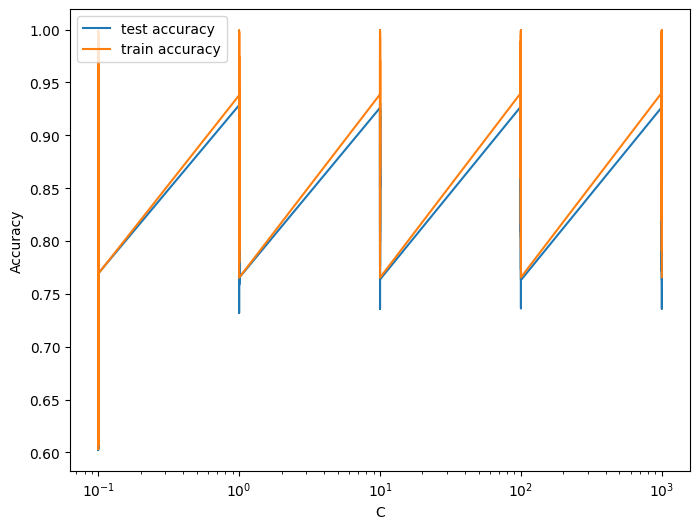

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(results['param_C'],results['mean_test_score'])
plt.plot(results['param_C'],results['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(['test accuracy','train accuracy'],loc="upper left")
plt.xscale('log')

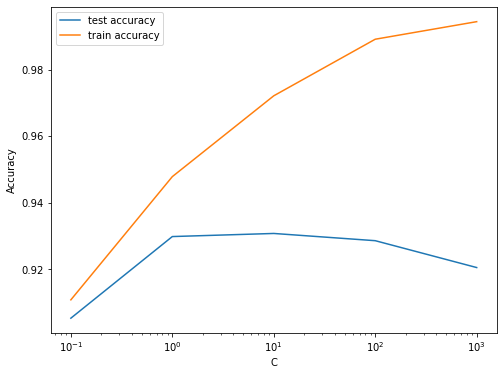

In [ ]:
# plot of C versus train and test scores


plt.figure(figsize=(8, 6))





Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data).



Let's finally look at the optimal C values found by GridSearchCV.

In [97]:
#get best score for above gridearch
best_score = grid_search.best_score_


#get best c value as well
best_C = grid_search.best_params_['C']


print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9304347826086955 at C = 10


Let's now look at the metrics corresponding to C=10.

In [105]:
# model with the best value of C
model = SVC(C=10)

# fit model on training data
model.fit(X_train,y_train)

# predict on test data
y_pred_rbf1 = model.predict(X_test)
y_pred_rbf1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, ..., 1, 0, 1])

In [106]:
#print confusion_matrix
confusion_matrix(y_test,y_pred_rbf1)



array([[810,  39],
       [ 57, 475]])

You can see type 2 error is reduced after hyperparameter tuning
![image.png](attachment:image.png)

Print other metrics


In [110]:
(np.array(y_test)).shape

(1381, 1)

In [115]:
y_pred_rbf1.reshape(-1,1).shape

(1381, 1)

In [123]:
from matplotlib.colors import ListedColormap

In [124]:
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [134]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 10], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

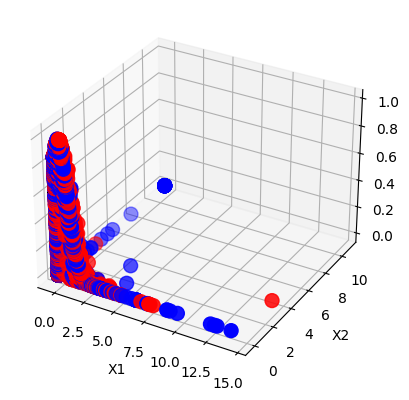

In [130]:
plot_3d_plot(X[:,:3],y)